# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

### Exercise 04.1

The Molecular Dynamics / Monte Carlo (MD_MC) code we have provided compute the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, and the temperature, $T$.

<span style="color:red">Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: block averages, progressive average values and progresssive uncertainties.</span>

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

### <span style="color:red"> Note</span>
In the code every changed line or group of lines of code has been noted by writing "//Changed", and every addition by writing "//Added" to make it easier to distinguish them.

### Exercise 04.2

By means of your upgraded code, <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained progressive average values and uncertainties as a functions of the increasing number of blocks for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$, in reduced units!

### <span style="color:green"> Equilibration is needed!</span>

By monitoring the temperature, $T$, during the first time steps of the simulation, you will observe that at the beginning, starting from a perfect crystalline configuration, $T$ will not conserve its value. Can you understand and explain this behaviour?

Explore and find the starting value of $T$ needed to stabilize, after a certain number of time steps (equilibration time), the average value of $T$ on the desired $T^\star$. <span style="color:red">Perform your solid/liquid phase MD simulations by re-starting them after such equilibration time.</span>

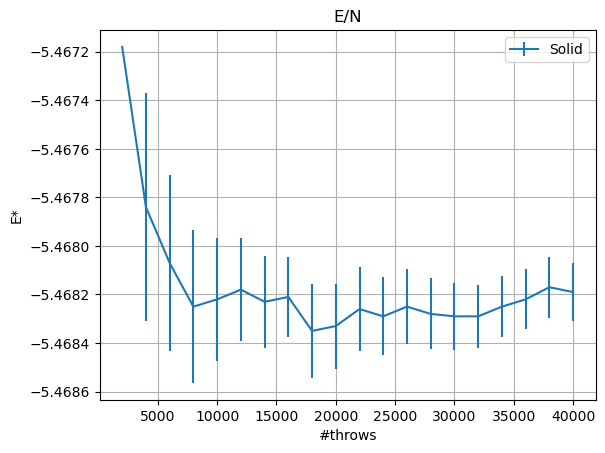

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

# Read the file
EnSol = np.loadtxt('output_solid_etot.dat')
EnGas = np.loadtxt('output_gas_etot.dat')
EnLiq = np.loadtxt('output_liquid_etot.dat')


# Extract the values and errors as separate Series
x = EnSol[:, 0]
EnSolVal = EnSol[:, 2]
EnSolErr = EnSol[:, 3]
EnLiqVal = EnLiq[:, 2]
EnLiqErr = EnLiq[:, 3]
EnGasVal = EnGas[:, 2]
EnGasErr = EnGas[:, 3]

L=2000              # Number of throws in each block,# Total number of throws
N=20                 # Number of blocks
M=L*N            # Total number of throws

x*=L # Number of throws = block * (Number of throws in each block)

plt.errorbar(x, EnSolVal, yerr=EnSolErr, label="Solid")


plt.xlabel('#throws')
plt.ylabel('E*')
plt.title('E/N')
plt.legend()
plt.grid(True)
plt.show()

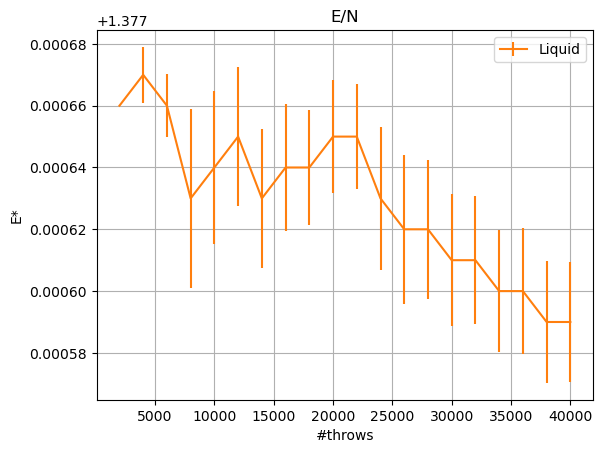

In [2]:

plt.errorbar(x, EnGasVal, yerr=EnGasErr, color='C1', label='Liquid')

plt.xlabel('#throws')
plt.ylabel('E*')
plt.title('E/N')
plt.legend()
plt.grid(True)
plt.show()

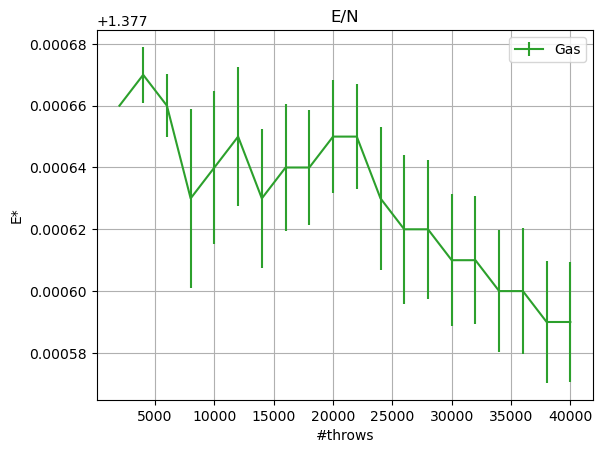

In [3]:

plt.errorbar(x, EnGasVal, yerr=EnGasErr, color='C2', label='Gas')

plt.xlabel('#throws')
plt.ylabel('E*')
plt.title('E/N')
plt.legend()
plt.grid(True)
plt.show()

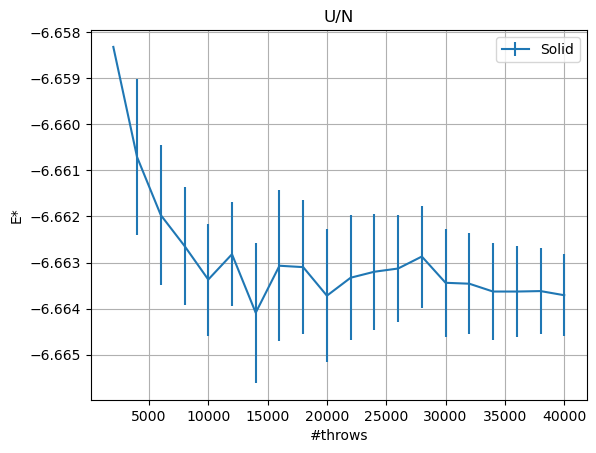

In [4]:
# Read the file
UnSol = np.loadtxt('output_solid_epot.dat')
UnGas = np.loadtxt('output_gas_epot.dat')
UnLiq = np.loadtxt('output_liquid_epot.dat')


# Extract the values and errors as separate Series
UnSolVal = UnSol[:, 2]
UnSolErr = UnSol[:, 3]
UnLiqVal = UnLiq[:, 2]
UnLiqErr = UnLiq[:, 3]
UnGasVal = UnGas[:, 2]
UnGasErr = UnGas[:, 3]

plt.errorbar(x, UnSolVal, yerr=UnSolErr, label='Solid')

plt.xlabel('#throws')
plt.ylabel('E*')
plt.legend()
plt.title('U/N')
plt.grid(True)
plt.show()

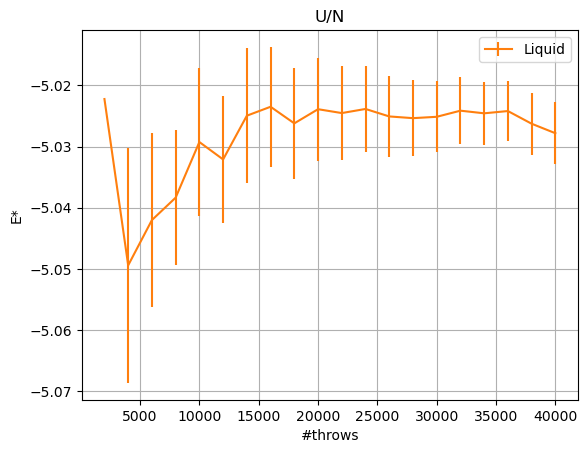

In [5]:

plt.errorbar(x, UnLiqVal, yerr=UnLiqErr, label="Liquid", color='C1')

plt.xlabel('#throws')
plt.ylabel('E*')
plt.title('U/N')
plt.legend()
plt.grid(True)
plt.show()

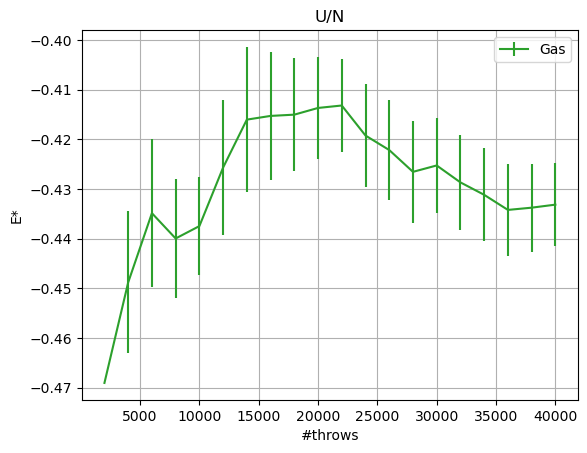

In [6]:
plt.errorbar(x, UnGasVal, yerr=UnGasErr, label="Gas", color='C2')

plt.xlabel('#throws')
plt.ylabel('E*')
plt.title('U/N')
plt.legend()
plt.grid(True)
plt.show()

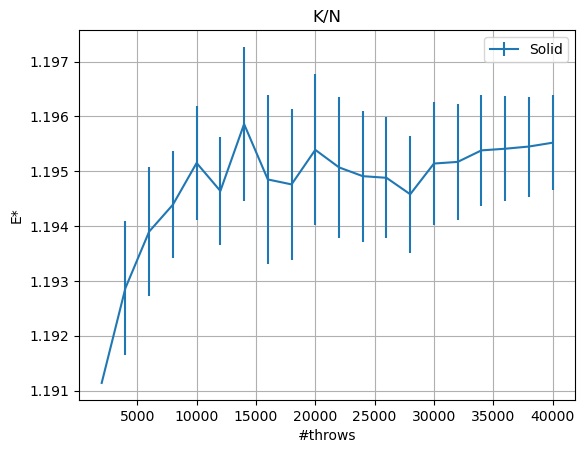

In [7]:
# Read the file
KnSol = np.loadtxt('output_solid_ekin.dat')
KnGas = np.loadtxt('output_gas_ekin.dat')
KnLiq = np.loadtxt('output_liquid_ekin.dat')


# Extract the values and errors as separate Series
KnSolVal = KnSol[:, 2]
KnSolErr = KnSol[:, 3]
KnLiqVal = KnLiq[:, 2]
KnLiqErr = KnLiq[:, 3]
KnGasVal = KnGas[:, 2]
KnGasErr = KnGas[:, 3]
plt.errorbar(x, KnSolVal, yerr=KnSolErr, label="Solid")


plt.xlabel('#throws')
plt.ylabel('E*')
plt.title('K/N')
plt.legend()
plt.grid(True)
plt.show()

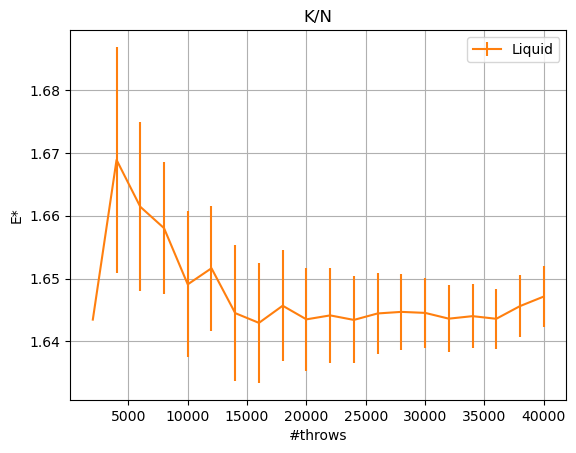

In [8]:
plt.errorbar(x, KnLiqVal, yerr=KnLiqErr, label="Liquid", color='C1')

plt.xlabel('#throws')
plt.ylabel('E*')
plt.title('K/N')
plt.legend()
plt.grid(True)
plt.show()

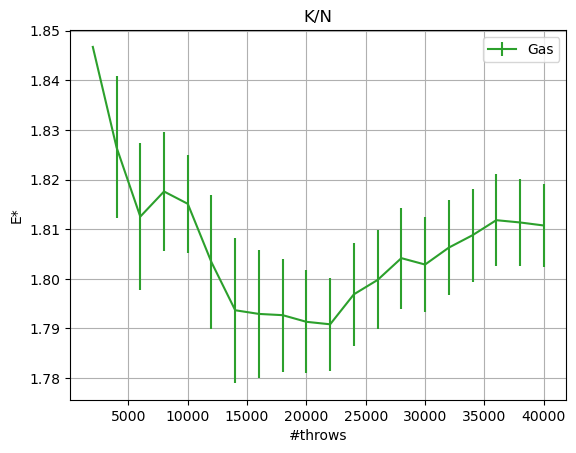

In [9]:
plt.errorbar(x, KnGasVal, yerr=KnGasErr, label="Gas", color='C2')

plt.xlabel('#throws')
plt.ylabel('E*')
plt.title('K/N')
plt.legend()
plt.grid(True)
plt.show()

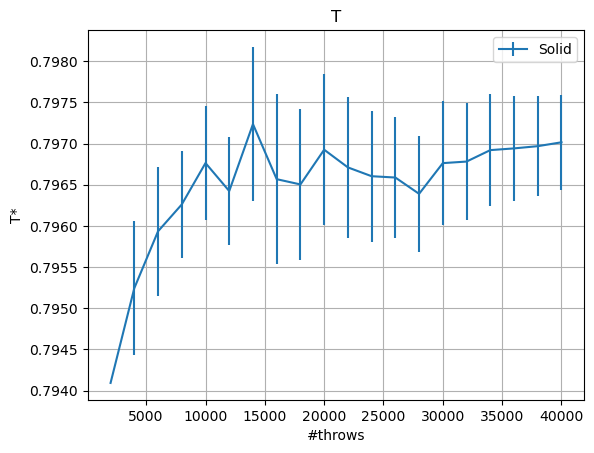

In [10]:
# Read the file
TSol = np.loadtxt('output_solid_temp.dat')
TGas = np.loadtxt('output_gas_temp.dat')
TLiq = np.loadtxt('output_liquid_temp.dat')


# Extract the values and errors as separate Series
TSolVal = TSol[:, 2]
TSolErr = TSol[:, 3]
TLiqVal = TLiq[:, 2]
TLiqErr = TLiq[:, 3]
TGasVal = TGas[:, 2]
TGasErr = TGas[:, 3]

plt.errorbar(x, TSolVal, yerr=TSolErr, label="Solid")


plt.xlabel('#throws')
plt.ylabel('T*')
plt.title('T')
plt.legend()
plt.grid(True)
plt.show()

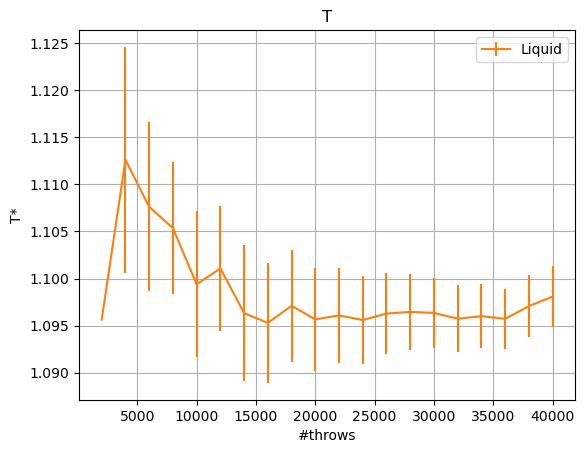

In [11]:



plt.errorbar(x, TLiqVal, yerr=TLiqErr, label="Liquid", color='C1', alpha=1)

plt.xlabel('#throws')
plt.ylabel('T*')
plt.title('T')
plt.legend()
plt.grid(True)
plt.show()

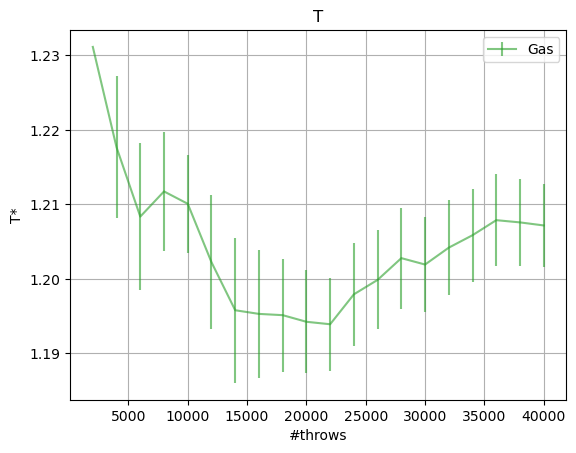

In [12]:
plt.errorbar(x, TGasVal, yerr=TGasErr, label="Gas", color='C2', alpha=0.6)

plt.xlabel('#throws')
plt.ylabel('T*')
plt.title('T')
plt.legend()
plt.grid(True)
plt.show()

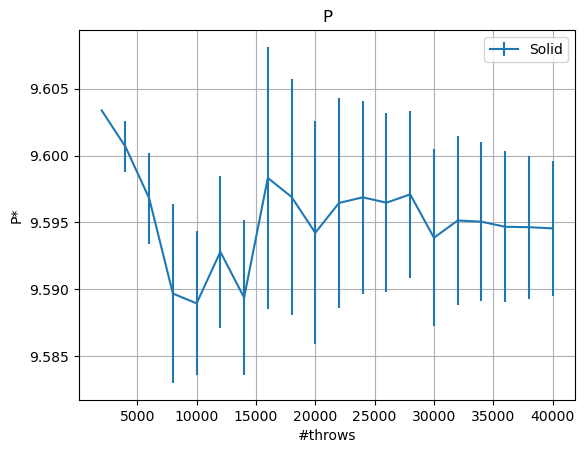

In [13]:
# Read the file
PSol = np.loadtxt('output_solid_pres.dat')
PLiq = np.loadtxt('output_liquid_pres.dat')


# Extract the values and errors as separate Series
PSolVal = PSol[:, 2]
PSolErr = PSol[:, 3]
PLiqVal = PLiq[:, 2]
PLiqErr = PLiq[:, 3]



plt.errorbar(x, PSolVal, yerr=PSolErr, label="Solid")

plt.xlabel('#throws')
plt.ylabel('P*')
plt.title('P')
plt.legend()
plt.grid(True)
plt.show()

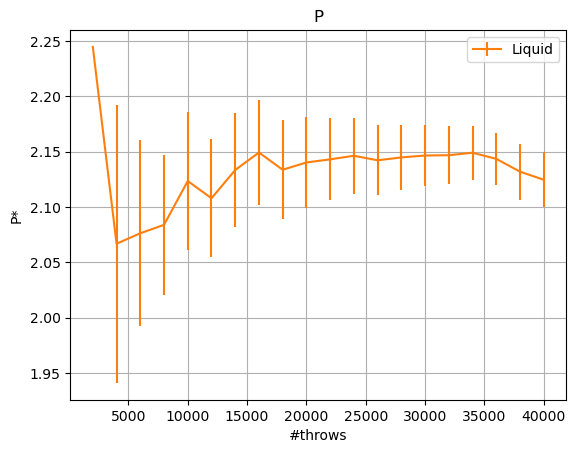

In [14]:
plt.errorbar(x, PLiqVal, yerr=PLiqErr, color='C1', label="Liquid")

plt.xlabel('#throws')
plt.ylabel('P*')
plt.title('P')
plt.legend()
plt.grid(True)
plt.show()

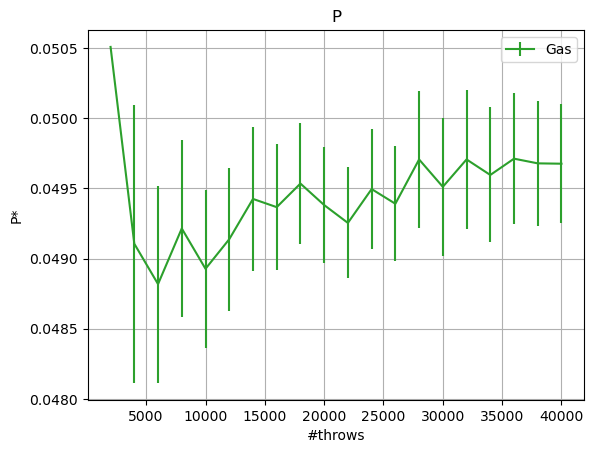

In [15]:
# Read the file
PGas = np.loadtxt('output_gas_pres.dat')


# Extract the values and errors as separate Series

PGasVal = PGas[:, 2]
PGasErr = PGas[:, 3]

plt.errorbar(x, PGasVal, yerr=PGasErr, color='C2', label='Gas')

plt.xlabel('#throws')
plt.ylabel('P*')
plt.title('P')
plt.legend()
plt.grid(True)
plt.show()

### Results
Starting from a perfect crystalline configuration, $T$ tends to decrease. This is because the Verleth algorithm, which we are using, conserves energy, and a perfect crystalline configuration has a lowerr potential energy than the average equilibrium configuration at that energy, so during the initial time evolution an increase in potential energy leads to a decrease in kinetic energy, and so a decrease in temperature too. To study our systema at a certain temperature we need to start it at higher temperature and simulate it for a while to equilibrate. Our code starts already in an equilibrium configuration, which is different depending on the input. As we can see in our results, there is no significant trend upwards or downwards of the temperature, the variations all fall within one or two standard deviations.